# Project Zebroid: Azure Implementation

In [2]:
import pandas as pd
import IPython
import nltk
import matplotlib.pyplot as plt
import math
import http.client, urllib.request, urllib.parse, urllib.error, base64, json, urllib
import speech_recognition as sr

from io import BytesIO
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from string import punctuation
from textblob import TextBlob as tb
from string import punctuation

In [3]:
%matplotlib inline

In [4]:
# Create holding variables
speechKey = '35da50b01bfb4066a6347288b05bb324'
soundFile = 'bush-clinton_debate_waffle.wav'
textAnalyticsURI = 'australiaeast.api.cognitive.microsoft.com'
textKey = '82f1c2b1358c48c28b599afd04866914'

In [5]:
# Import the sound file and listen to it
IPython.display.Audio(soundFile, autoplay=True)

In [6]:
# Transcribe the Audio and write to text file
# Read the audio file
r = sr.Recognizer()
with sr.AudioFile(soundFile) as source:
    audio = r.record(source)
    
# Transcribe the audio using the Bing Speech API
try:
    transcription = r.recognize_bing(audio, key=speechKey)
    # For the meantime, just print the output
    with open("Output3.txt", "w") as text_file:
        text_file.write(transcription)
    print(transcription)
except sr.UnknownValueError:
    print("The audio was unclear")
except sr.RequestError as e:
    print(e)
    print("Something went wrong :-(; {0}".format(e))

the big argument i have the governor on this is this taking different positions on different issues trying to be one thing to one person here that's opposing the nafta agreement and then for it but we call waffling you can't turn the white house into the waffle house you gotta say what your for the washington post ran along at eternal they said they couldn't believe mister bush with making character an issue and they said he was the greatest quote political should million for changing his positions of all time now i don't wanna get into that you don't have to believe that i'm not interested in his character i want to change the character of the presidency


In [7]:
# Normalize the text if need be (remove punctuation)
# Load the document
transcript = open("Output.txt", "r")
# read the document and print contents
transcriptTxt = transcript.read()

# remove numeric digits
transcriptTxt = ''.join(c for c in transcriptTxt if not c.isdigit())

# remove punctuation and make lower case
transcriptTxt = ''.join(c for c in transcriptTxt if not c in punctuation).lower()

# print normalized text
print('NORMALIZED TEXT:' + transcriptTxt)

NORMALIZED TEXT:the big argument i have the governor on this is this taking different positions on different issues trying to be one thing to one person here thats opposing the nafta agreement and then for it but we call waffling you cant turn the white house into the waffle house you gotta say what your for the washington post ran along at eternal they said they couldnt believe mister bush with making character an issue and they said he was the greatest quote political should million for changing his positions of all time now i dont wanna get into that you dont have to believe that im not interested in his character i want to change the character of the presidency


In [8]:
# Get frequency distribution
nltk.download("punkt")

# Tokenize the text into individual words
words = nltk.tokenize.word_tokenize(transcriptTxt)

# Get the frequency distribution of the words into a data frame
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index = [0]).T
count_frame.columns = ['Count']
print(count_frame)

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Will\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
            Count
agreement       1
all             1
along           1
an              1
and             2
argument        1
at              1
be              1
believe         2
big             1
bush            1
but             1
call            1
cant            1
change          1
changing        1
character       3
couldnt         1
different       2
dont            2
eternal         1
for             3
get             1
got             1
governor        1
greatest        1
have            2
he              1
here            1
his             2
...           ...
quote           1
ran             1
said            2
say             1
should          1
ta              1
taking          1
that            2
thats           1
the             9
then            1
they            3
thing           1
this            2
time            1
to 

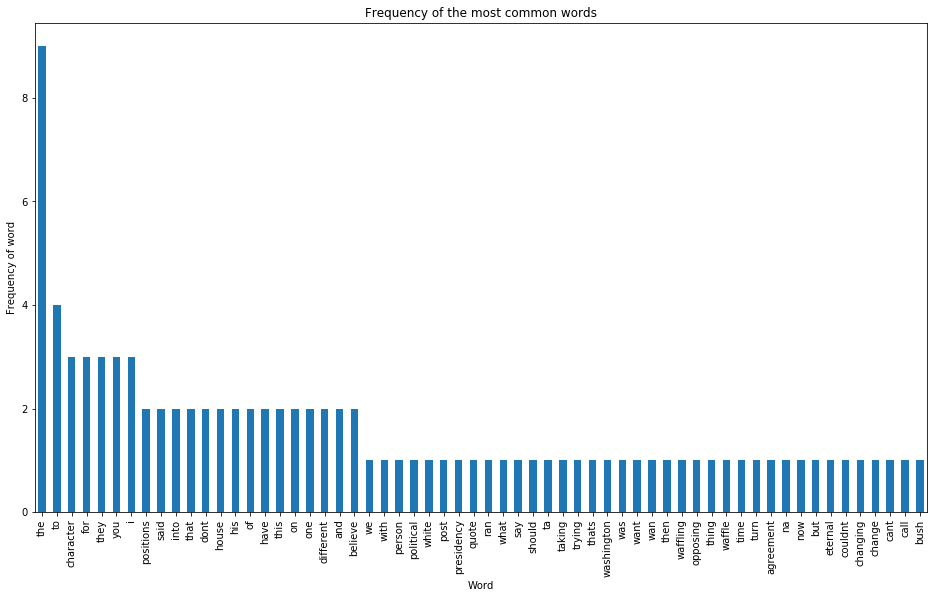

In [9]:
# Visualize word frequency
counts = count_frame.sort_values('Count', ascending=False)
fig = plt.figure(figsize=(16,9))
ax = fig.gca()
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

In [10]:
# remove stop words
nltk.download("stopwords")
transcriptTxt = ' '.join([word for word in transcriptTxt.split() if word not in (stopwords.words('english'))])
print(transcriptTxt)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Will\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
big argument governor taking different positions different issues trying one thing one person thats opposing nafta agreement call waffling cant turn white house waffle house gotta say washington post ran along eternal said couldnt believe mister bush making character issue said greatest quote political million changing positions time dont wanna get dont believe im interested character want change character presidency


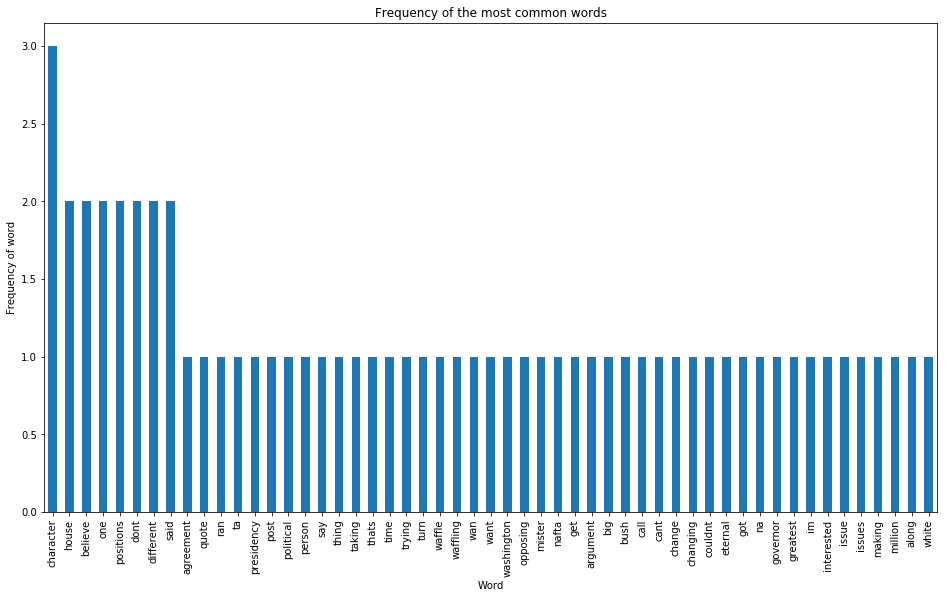

In [11]:
# Visualize the Frequency Distribution for the remaining words
words = nltk.tokenize.word_tokenize(transcriptTxt)
fdist = FreqDist(words)
count_frame = pd.DataFrame(fdist, index=[0]).T
count_frame.columns = ['Count']

# Plot the frequency for the top words
counts = count_frame.sort_values('Count', ascending = False)
fig = plt.figure(figsize=(16,9))
ax = fig.gca()
counts['Count'][:60].plot(kind = 'bar', ax = ax)
ax.set_title('Frequency of the most common words')
ax.set_ylabel('Frequency of word')
ax.set_xlabel('Word')
plt.show()

In [12]:
# Use text analytics to determine key phrases

# define request headers
headers = {
    'Content-type': 'application/json',
    'Ocp-Apim-Subscription-Key': textKey,
    'Accept': 'application/json'
}

# Define the parameters
params = urllib.parse.urlencode({
    
})

# Define the request body
body = {
    "documents": [
        {
            "language": "en",
            "id": "1",
            "text": transcriptTxt
        }
    ]
}

try:
    # Execute the REST API call and get the response
    conn = http.client.HTTPSConnection(textAnalyticsURI)
    conn.request("POST", "/text/analytics/v2.0/keyPhrases?%s" % params, str(body), headers)
    response = conn.getresponse()
    data = response.read()
    
    # 'data' contains the JSON data. The following formats the JSON data for display
    parsed = json.loads(data)
    for document in parsed['documents']:
        print("Document " + document["id"] + " key phrases:")
        for phrase in document['keyPhrases']:
            print(" " + phrase)
        print("--------------------------")
    conn.close()

except Exception as e:
    print('Error:')
    print(e)

Document 1 key phrases:
 character issue
 different positions different issues
 change character presidency
 changing positions time dont wanna
 white house waffle house gotta
 greatest quote political
 waffling
 thing
 nafta agreement
 person thats
 washington post
 big argument governor
--------------------------


In [13]:
# Perform sentiment analysis
try:
    conn = http.client.HTTPSConnection(textAnalyticsURI)
    conn.request("POST", "/text/analytics/v2.0/sentiment?%s" % params, str(body), headers)
    response = conn.getresponse()
    data = response.read()
    parsed = json.loads(data)
    for document in parsed['documents']:
        sentiment = "negative"
        if document["score"] >= 0.5:
            sentiment = "positive"
        print("Conversation " + document["id"] + ": = " + sentiment)
        print("Score: " + str(document["score"]))
    conn.close()
except Exception as e:
    print("[Errno {0}] {1}".format(e.errno, e.strerror))

Conversation 1: = positive
Score: 0.7767407894134521
